#Google Stock Price Prediction Using RNN

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
#training set
dataset_train = pd.read_csv('datasets/Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2]
training_set.head()

,Open
0,325.25
1,331.27
2,329.83
3,328.34
4,322.04


In [3]:
dataset_train.shape

(1258, 6)

In [4]:
#Feature Scaling
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range = (0,1))
training_set_scaled = sc.fit_transform(training_set)

In [5]:
#Implementation of LSTM
X_train = []
Y_train = []

#Creation a data structure with 60 timesteps and 1 output
for i in range(60,1258):
  X_train.append(training_set_scaled[i-60:i, 0])
  Y_train.append(training_set_scaled[i,0])

X_train, Y_train = np.array(X_train), np.array(Y_train)

#reshape array
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [6]:
from keras.models import  Sequential
from keras.layers import Dense, LSTM, Dropout

#Initialising the RNN
regressor = Sequential()

#Add LSTM layer and drop regularisation
regressor.add(LSTM(units=50, return_sequences=True,input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))

#Add 2nd LSTM layer and drop regularisation
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

#Add 3rd LSTM layer and drop regularisation
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

#Add 4th LSTM layer and drop regularisation
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

#Add output layer
regressor.add(Dense(units=1))

In [7]:
#Compile the RNN
regressor.compile(optimizer='adam',loss='mean_squared_error')

In [8]:
#Fitting the compiled model to training set
regressor.fit(X_train,Y_train, epochs=100, batch_size=32)

Epoch 1/100
38/38 [==============================] - 12s 141ms/step - loss: 0.1095
Epoch 2/100
38/38 [==============================] - 5s 137ms/step - loss: 0.0077
Epoch 3/100
38/38 [==============================] - 5s 143ms/step - loss: 0.0052
Epoch 4/100
38/38 [==============================] - 5s 137ms/step - loss: 0.0056
Epoch 5/100
38/38 [==============================] - 5s 139ms/step - loss: 0.0052
Epoch 6/100
38/38 [==============================] - 5s 137ms/step - loss: 0.0047
Epoch 7/100
38/38 [==============================] - 5s 138ms/step - loss: 0.0045
Epoch 8/100
38/38 [==============================] - 5s 137ms/step - loss: 0.0044
Epoch 9/100
38/38 [==============================] - 5s 142ms/step - loss: 0.0045
Epoch 10/100
38/38 [==============================] - 5s 136ms/step - loss: 0.0039
Epoch 11/100
38/38 [==============================] - 5s 139ms/step - loss: 0.0039
Epoch 12/100
38/38 [==============================] - 5s 138ms/step - loss: 0.0041
Epoch 13/100

In [9]:
#load the stock price test data
dataset_test = pd.read_csv('datasets/Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:,1:2].values

In [10]:
#get predicted stock price for the following year
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']),axis=0)

inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)
X_test = []

for i in range(60, 80):
  X_test.append(inputs[i-60:i, 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

predicted_stock_price = regressor.predict(X_test)

predicted_stock_price = sc.inverse_transform(predicted_stock_price)

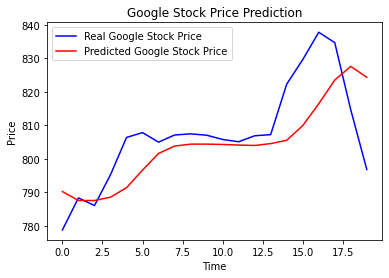

In [11]:
#visualize the results of predicted and real stock price
plt.plot(real_stock_price, color='b',label='Real Google Stock Price')
plt.plot(predicted_stock_price, color='r',label='Predicted Google Stock Price')

#title, labels, legend
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()